# importing libraries


In [1]:
import numpy 
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [3]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
aa=pd.DataFrame(boston.data,columns=boston.feature_names)
aa
items=pd.DataFrame(boston.data,columns=boston.feature_names)
items.to_csv("boston_sklearn.csv")
items.shape
aa.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

# load dataset from sir with 14 colms

In [4]:
names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT','MEDV']
dataset=pd.read_csv('boston housing.csv',delim_whitespace=True,names=names)
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
from tensorflow.python import keras
print(keras.__version__)

2.4.0


# Summarize data

# Descriptive Statistics

In [6]:
#shape
dataset.shape

(506, 14)

In [7]:
#types
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
#head
dataset.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [9]:
#description change precision to 2 place
set_option('precision',1)
print(dataset.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


In [10]:
#correlation
set_option('precision',2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

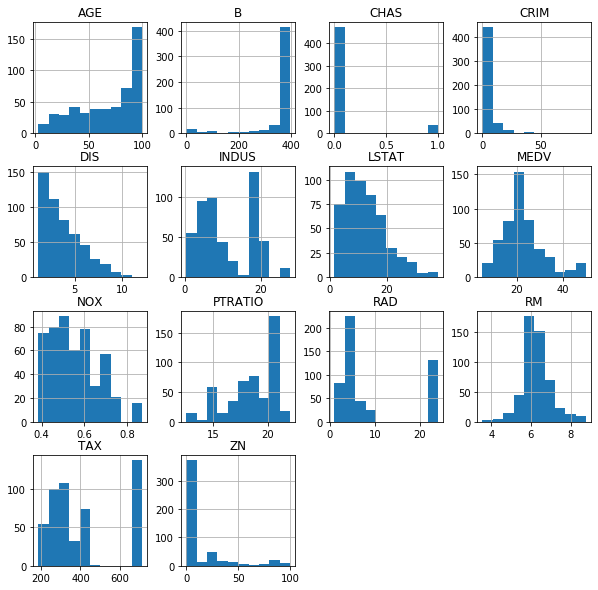

In [11]:
#data visualisation
dataset.hist()
pyplot.show()


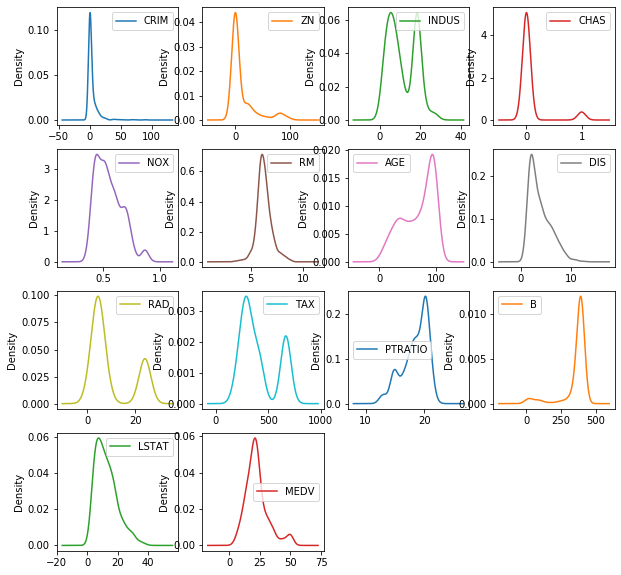

In [12]:
#density
dataset.plot(kind='density',subplots=True,layout=(4,4),sharex=False)
pyplot.show()

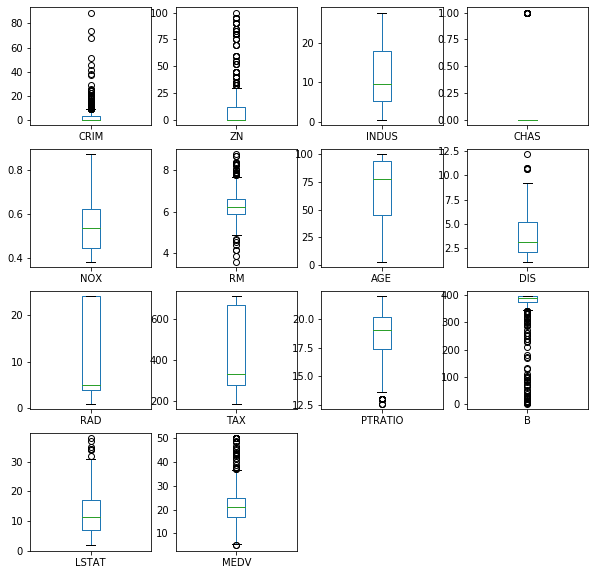

In [13]:
#box and whisker plots
dataset.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False)
pyplot.show()

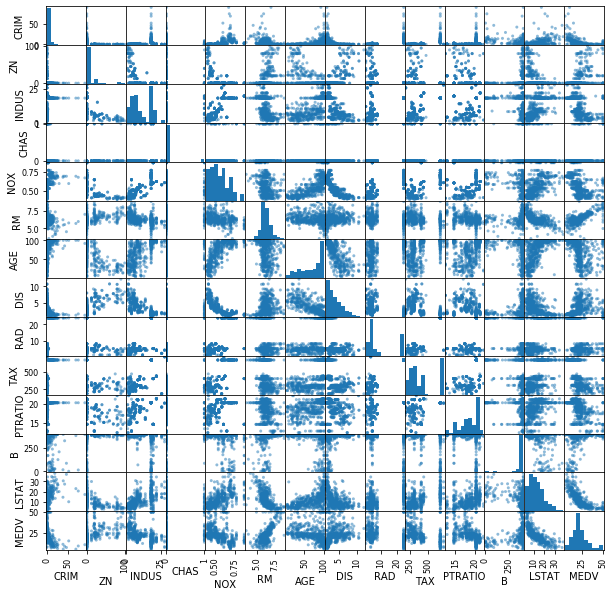

In [14]:
#scatterplot matrix
scatter_matrix(dataset)
pyplot.show()

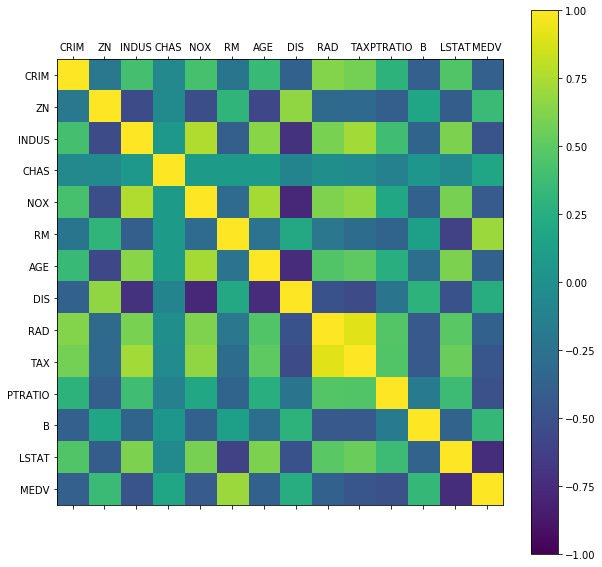

In [15]:
#correlation matrix
fig=pyplot.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(dataset.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
ticks=arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [17]:
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222.0,18.7,396.90,5.33,36.2


# Prepare data

In [21]:
# split-out validation dataset
array=dataset.values
x=array[:,0:13]
y=array[:,13]
validation_size=0.20
seed=7
x_train,x_validation,y_train,y_validation=train_test_split(x,y,test_size=validation_size,random_state=seed)
x_train,x_validation,y_train,y_validation

(array([[1.06590e-01, 8.00000e+01, 1.91000e+00, ..., 2.20000e+01,
         3.76040e+02, 5.57000e+00],
        [4.81213e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         2.55230e+02, 1.64200e+01],
        [6.89900e-02, 0.00000e+00, 2.56500e+01, ..., 1.91000e+01,
         3.89150e+02, 1.43700e+01],
        ...,
        [8.40540e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
         3.03420e+02, 1.65100e+01],
        [4.01100e-02, 8.00000e+01, 1.52000e+00, ..., 1.26000e+01,
         3.96900e+02, 4.08000e+00],
        [6.66400e-02, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
         3.90960e+02, 5.33000e+00]]),
 array([[3.84970e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         3.91340e+02, 1.32700e+01],
        [3.04100e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
         3.94810e+02, 1.05600e+01],
        [2.41030e-01, 0.00000e+00, 7.38000e+00, ..., 1.96000e+01,
         3.96900e+02, 1.27900e+01],
        ...,
        [4.11300e-02, 2.50000e+01, 4.86000e+00, ..., 1

In [46]:
# evaluate algorithms
#test options and evaluation metric
num_folds=10
seed=7
scoring='neg_mean_squared_error'

In [47]:
# spot check algorithm
models=[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

In [49]:
#evaluate each model in turn
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

D:\Programdata\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\Programdata\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\Programdata\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\Programdata\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. Yo

LR:-21.379856(9.414264)
LASSO:-26.423561(11.651110)
EN:-27.502259(12.305022)
KNN:-41.896488(13.901688)
CART:-25.776898(11.079678)
SVR:-67.827886(29.049138)


D:\Programdata\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[Text(0, 0, 'LR'),
 Text(0, 0, 'LASSO'),
 Text(0, 0, 'EN'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'SVR')]

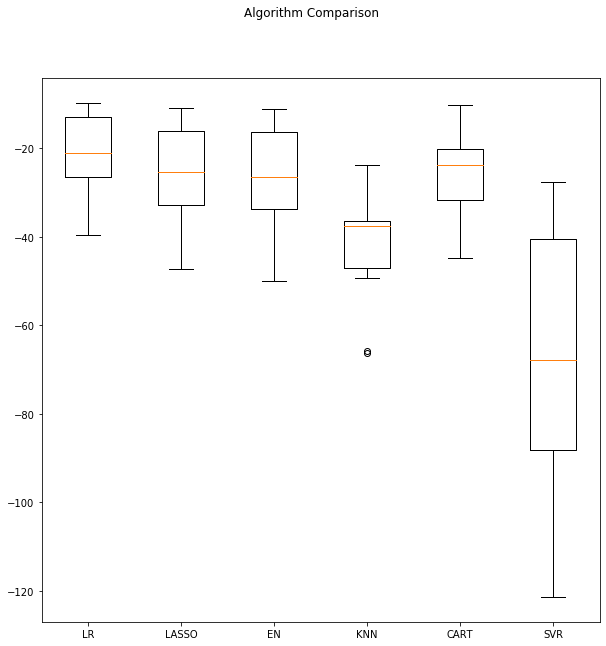

In [51]:
# compare algorithms
fig=pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)

In [56]:
#standardize the dataset
pipelines=[]
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO',Pipeline([('Scaler',StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN',Pipeline([('Scaler',StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR',Pipeline([('Scaler',StandardScaler()),('SVR',SVR())])))
results=[]
names=[]
for name,model in pipelines:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

D:\Programdata\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\Programdata\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\Programdata\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\Programdata\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. Yo

ScaledLR:-21.379856(9.414264)
ScaledLASSO:-26.607314(8.978761)
ScaledEN:-27.932372(10.587490)
ScaledKNN:-20.107620(12.376949)
ScaledCART:-28.991076(14.397626)
ScaledSVR:-29.633086(17.009186)


D:\Programdata\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[Text(0, 0, 'ScaledLR'),
 Text(0, 0, 'ScaledLASSO'),
 Text(0, 0, 'ScaledEN'),
 Text(0, 0, 'ScaledKNN'),
 Text(0, 0, 'ScaledCART'),
 Text(0, 0, 'ScaledSVR')]

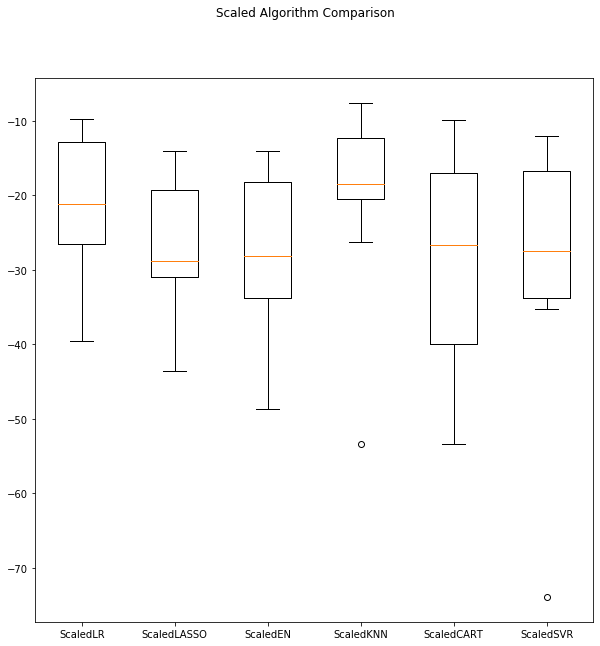

In [57]:
#compare algorithms
fig=pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)

In [65]:
# KNN algorithm tuning
scaler=StandardScaler().fit(x_train)
rescaledX=scaler.transform(x_train)
k_values=numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid=dict(n_neighbors=k_values)
model=KNeighborsRegressor()
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaledX,y_train)
print("Best: %f using %s" %(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))

D:\Programdata\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -18.109304 using {'n_neighbors': 3}
-20.169640 (14.986904) with: {'n_neighbors': 1}
-18.109304 (12.880861) with: {'n_neighbors': 3}
-20.063115 (12.138331) with: {'n_neighbors': 5}
-20.514297 (12.278136) with: {'n_neighbors': 7}
-20.319536 (11.554509) with: {'n_neighbors': 9}
-20.963145 (11.540907) with: {'n_neighbors': 11}
-21.099040 (11.870962) with: {'n_neighbors': 13}
-21.506843 (11.468311) with: {'n_neighbors': 15}
-22.739137 (11.499596) with: {'n_neighbors': 17}
-23.829011 (11.277558) with: {'n_neighbors': 19}
-24.320892 (11.849667) with: {'n_neighbors': 21}


In [67]:
#ensembles
ensembles=[]
ensembles.append(('ScaledAB',Pipeline([('Scaler',StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM',Pipeline([('Scaler',StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF',Pipeline([('Scaler',StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET',Pipeline([('Scaler',StandardScaler()),('ET',ExtraTreesRegressor())])))
results=[]
names=[]
for name,model in ensembles:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

D:\Programdata\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledAB:-15.258778(6.735665)


D:\Programdata\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledGBM:-10.367517(4.608503)


D:\Programdata\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledRF:-11.627098(6.197732)


D:\Programdata\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledET:-9.249609(5.600185)


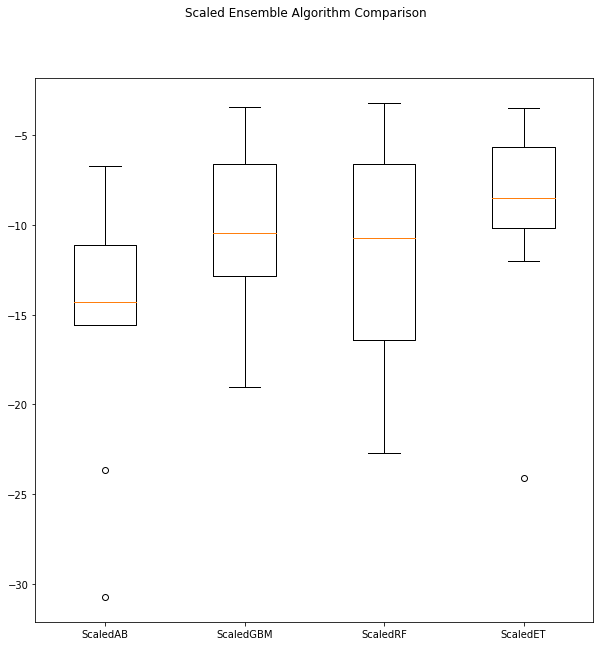

In [70]:
#compare algorithms
fig=pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [74]:
# tune scaled GBM
scaler=StandardScaler().fit(x_train)
rescaledX=scaler.transform(x_train)
param_grid=dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model=GradientBoostingRegressor(random_state=seed)
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaledX,y_train)
print("Best: %f using %s" %(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))


D:\Programdata\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -9.379670 using {'n_estimators': 400}
-10.813179 (4.856738) with: {'n_estimators': 50}
-10.057375 (4.566986) with: {'n_estimators': 100}
-9.718097 (4.404730) with: {'n_estimators': 150}
-9.565306 (4.394355) with: {'n_estimators': 200}
-9.477007 (4.376433) with: {'n_estimators': 250}
-9.453795 (4.385228) with: {'n_estimators': 300}
-9.394901 (4.367860) with: {'n_estimators': 350}
-9.379670 (4.382001) with: {'n_estimators': 400}


In [22]:
#make predictions on validation dataset
#prepare the model
scaler=StandardScaler().fit(x_train)
rescaledX=scaler.transform(x_train)
model=GradientBoostingRegressor(random_state=seed,n_estimators=400)
model.fit(rescaledX,y_train)
#transform the validation dataset
rescaledValidationX=scaler.transform(x_validation)
predictions=model.predict(rescaledValidationX)
MSE=mean_squared_error(y_validation,predictions)
print(MSE)

11.902132586880027


In [24]:
RMSE = numpy.sqrt(MSE)
RMSE

3.4499467513108124